## Timelag Analysis of Model Performance

This notebook compares how **LSTM** and **Transformer** models perform across different input time windows (timelags). It:

- Loads F1 and AUCPR metrics for various timelags and seeds,
- Computes mean performance per timelag,
- Visualizes metric trends across Training, Validation, and Testing sets.

The goal is to understand how input history length influences prediction quality and guide model/timelag selection.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/paulinebecker/Desktop/mesogeos_git/mesogeos/csv/Timelag_Analysis/maxValidationSeed_Timelag_Anaylsis.csv", sep=',')

df['Timelag'] = df['Timelag'].astype(int)
df.sort_values(by='Timelag', inplace=True)
df

,Unnamed: 0,Timelag,Model,F1 Training,F1 Validation,F1 Testing,AUCPR Training,AUCPR Validation,AUCPR Testing,Seed,Date
0,17,5,Transformer,0.812833,0.803002,0.769604,0.886500,0.871612,0.853039,1234,70
1,1,5,LSTM,0.807737,0.803021,0.764322,NaN,0.865251,0.829873,8,0703_120010
2,3,10,LSTM,0.827546,0.817783,0.778537,NaN,0.881621,0.848281,8,0703_130438
3,2,10,Transformer,0.829837,0.812580,0.779505,NaN,0.886761,0.864031,9,/0704_071735
4,5,15,LSTM,0.832499,0.822793,0.779359,NaN,0.887174,0.871353,3,0703_133700
5,15,15,Transformer,0.833825,0.816275,0.784135,0.904510,0.892763,0.865140,1234,70
6,7,20,LSTM,0.837223,0.827930,0.775552,NaN,0.891113,0.851250,3,0703_144153
7,14,20,Transformer,0.846883,0.817722,0.788604,0.916507,0.888227,0.863853,1234,70
8,9,25,LSTM,0.841817,0.828750,0.771319,NaN,0.893475,0.853970,3,0703_154627
9,8,25,Transformer,0.847634,0.823529,0.792332,NaN,0.897801,0.862939,8,0704_122024


In [6]:
import pandas as pd


def append_mean_rows_by_timelag(model_csv, output_path):
    df = model_csv

    value_columns = [col for col in df.columns if col not in ["Timelag", "Model", "Seed", "Date"]]

    mean_rows = df.groupby("Timelag")[value_columns].mean().reset_index()

    mean_rows["Model"] = "mean"
    mean_rows["Seed"] = -1
    mean_rows["Date"] = "mean"

    df_with_means = pd.concat([df, mean_rows], ignore_index=True)


    df_with_means.to_csv(output_path, index=False)

    print(f" Saved file with mean rows to: {output_path}")
    return df_with_means


append_mean_rows_by_timelag(lstm, "/Users/I566184/bachelorarbeit_coding/mesogeos/csv/Timelag_Analysis/lstm_Seed0_9_all_timelags1.csv")

NameError: name 'lstm' is not defined

In [6]:
def plot_metric_over_timelag(metric_prefix, ylabel, title):
    plt.figure(figsize=(10, 6))

    colors = {
        'Transformer': ['#FF3E1B', '#C9021D', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['#40F6FF', '#3383C9', '#1725C9']          # hellblau, mittelblau, dunkelblau
    }

    linestyles = {
        'Training': ':',      # dotted
        'Validation': '--',   # dashed
        'Testing': '-'        # solid
    }

    linewidths = {
        'Training': 1.5,
        'Validation': 1.5,
        'Testing': 3          # make test lines stand out
    }

    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        for i, split in enumerate(['Training', 'Validation', 'Testing']):
            plt.plot(subset['Timelag'],
                     subset[f"{metric_prefix} {split}"],
                     marker='o',
                     label=f"{model} - {split}",
                     color=colors[model][i],
                     linestyle=linestyles[split],
                     linewidth=linewidths[split])

    plt.xlabel("Timelag", fontsize=14, fontweight='medium')
    plt.ylabel(ylabel, fontsize=14, fontweight='medium')
    plt.xticks(subset['Timelag'].unique(), fontsize=14)
    plt.yticks(fontsize=14)
    plt.title("")  # or: plt.title(title, fontsize=18, fontweight='medium')
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/paulinebecker/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Timelag/{metric_prefix}_Timelag_bestSeed.pdf", format="pdf", dpi=300)
    plt.show()

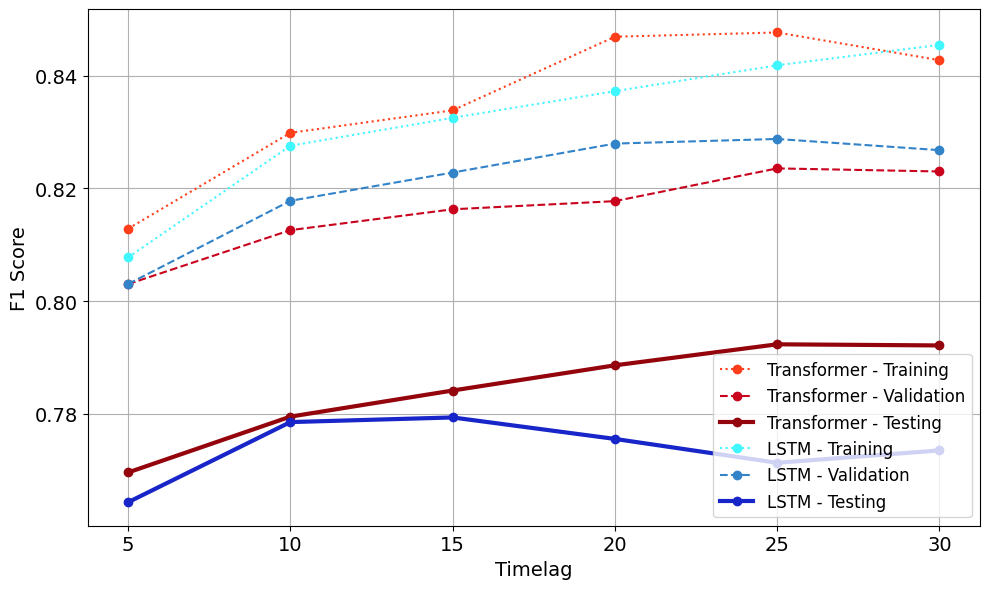

In [7]:
plot_metric_over_timelag('F1', 'F1 Score', 'F1 Score Across Different Timelags per Model and Dataset Split')

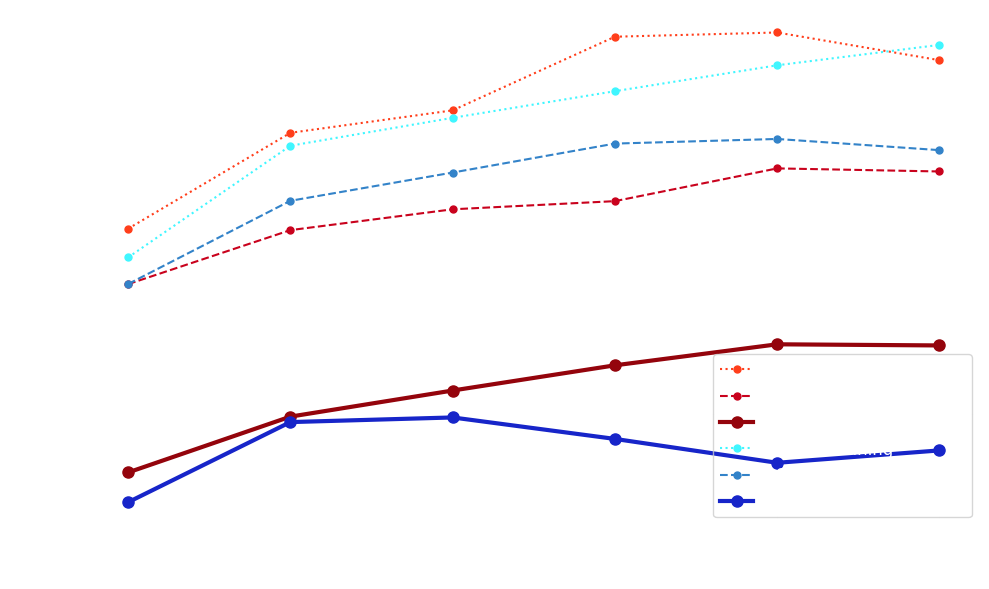

In [8]:
def plot_metric_over_timelag(metric_prefix, ylabel, title):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    fig = plt.gcf()
    fig.patch.set_alpha(0.0)  # Transparenter Hintergrund außerhalb der Achse
    ax.set_facecolor("none")  # Transparenter Hintergrund innerhalb der Achse

    colors = {
        'Transformer': ['#FF3E1B', '#C9021D', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['#40F6FF', '#3383C9', '#1725C9']          # hellblau, mittelblau, dunkelblau
    }

    linestyles = {
        'Training': ':',     # dotted
        'Validation': '--',  # dashed
        'Testing': '-'       # solid
    }

    linewidths = {
        'Training': 1.5,
        'Validation': 1.5,
        'Testing': 3.0       # dicker für Testdaten
    }

    markersizes = {
        'Training': 5,
        'Validation': 5,
        'Testing': 8         # größere Marker für Testdaten
    }

    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        for i, split in enumerate(['Training', 'Validation', 'Testing']):
            plt.plot(subset['Timelag'],
                     subset[f"{metric_prefix} {split}"],
                     marker='o',
                     markersize=markersizes[split],
                     label=f"{model} - {split}",
                     color=colors[model][i],
                     linestyle=linestyles[split],
                     linewidth=linewidths[split])

    # Achsen und Beschriftungen in Weiß
    ax.tick_params(colors='white', labelsize=14)
    for spine in ax.spines.values():
        spine.set_color('white')

    plt.xlabel("Timelag", fontsize=14, fontweight='medium', color='white')
    plt.ylabel(ylabel, fontsize=14, fontweight='medium', color='white')
    plt.xticks(subset['Timelag'].unique(), fontsize=14, color='white')
    plt.yticks(fontsize=14, color='white')
    plt.title("")  # Kein Titel

    # Legende mit weißer Schrift
    legend = plt.legend(fontsize=12)
    for text in legend.get_texts():
        text.set_color("white")
    legend.get_frame().set_facecolor("none")  # Transparente Legendenbox

    plt.grid(True, color='white', alpha=0.2)  # Weißes Grid leicht transparent
    plt.tight_layout()

    plt.savefig(
        f"/Users/paulinebecker/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Timelag/{metric_prefix}_Timelag_bestSeed_transparent.pdf",
        format="pdf", dpi=300, transparent=True  # Transparent speichern
    )
    plt.show()
plot_metric_over_timelag('F1', 'F1 Score', 'F1 Score Across Different Timelags per Model and Dataset Split')

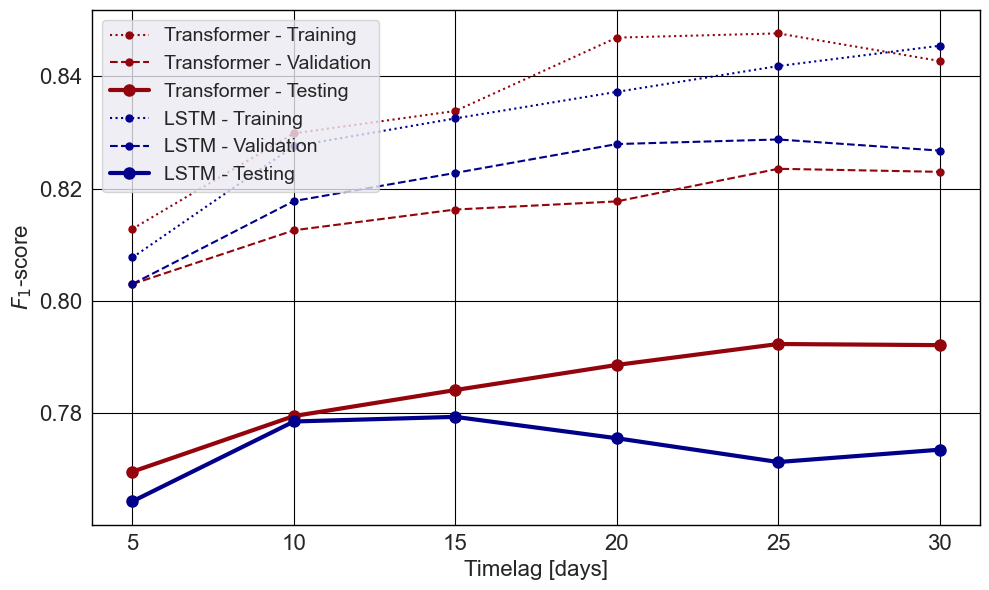

In [9]:
def plot_metric_over_timelag_black(metric_prefix, ylabel, title):
    plt.figure(figsize=(10, 6))

    colors = {
        'Transformer': ['#FF3E1B', '#C9021D', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['#40F6FF', '#3383C9', '#1725C9']          # hellblau, mittelblau, dunkelblau
    }

    colors = {
        'Transformer': ['#94040C', '#94040C', '#94040C'],  # hellrot, mittelrot, dunkelrot
        'LSTM': ['darkblue', 'darkblue', 'darkblue']          # hellblau, mittelblau, dunkelblau
    }

    linestyles = {
        'Training': ':',     # dotted
        'Validation': '--',  # dashed
        'Testing': '-'       # solid
    }

    linewidths = {
        'Training': 1.5,
        'Validation': 1.5,
        'Testing': 3.0       # dickere Linie für Testdaten
    }

    markersizes = {
        'Training': 5,
        'Validation': 5,
        'Testing': 8         # größere Marker für Testdaten
    }

    for model in df['Model'].unique():
        subset = df[df['Model'] == model]
        for i, split in enumerate(['Training', 'Validation', 'Testing']):
            plt.plot(subset['Timelag'],
                     subset[f"{metric_prefix} {split}"],
                     marker='o',
                     markersize=markersizes[split],
                     label=f"{model} - {split}",
                     color=colors[model][i],
                     linestyle=linestyles[split],
                     linewidth=linewidths[split])

    # Hintergrund innerhalb des Plots transparent machen
    ax = plt.gca()
    ax.set_facecolor("none")
    for spine in ax.spines.values():
        spine.set_color("black")
        spine.set_linewidth(1)

    plt.xlabel("Timelag [days]", fontsize=16, fontweight='medium')
    plt.ylabel(r"$F_1$-score", fontsize=16, fontweight='medium')
    plt.xticks(subset['Timelag'].unique(), fontsize=16)
    plt.yticks(fontsize=16)

    plt.title("")
    plt.legend(fontsize=14, loc='upper left')
    plt.grid(True, color='black')  # Gitterno  schwarz
    plt.tight_layout()

    plt.savefig(
        f"/Users/paulinebecker/Library/Mobile Documents/com~apple~CloudDocs/Uni/Wirtschaftsinformatik KIT/Semester6/Bachlorarbeit/Graphics/Results/Paper Revision/{metric_prefix}_Timelag_bestSeed_black.png",
        format="png", dpi=300, transparent=True
    )
    plt.show()

plot_metric_over_timelag_black('F1', 'F1 Score', 'F1 Score Across Different Timelags per Model and Dataset Split')

In [ ]:
# AUCPR-Plot
plot_metric_over_timelag('AUCPR', 'AUCPR', 'AUCPR Across Different Timelags per Model and Dataset Split')